## 1. Judul / Topik Proyek dan Identitas Lengkap
Judul: Prediksi Jumlah Wisatawan dengan Algoritma Prediktif

Nama: Erlanda Galant Prasetio

NIM: A11.2022.14194

## 2. Ringkasan dan Permasalahan Proyek
Ringkasan: Proyek ini bertujuan untuk merancang dan mengimplementasikan model prediksi jumlah wisatawan pada tahun 2024 berdasarkan analisis data historis dari tahun 2020 hingga 2023. Dengan memanfaatkan metode data mining, proyek ini diharapkan mampu mengidentifikasi pola-pola dalam data historis guna menghasilkan prediksi yang akurat. Pendekatan ini relevan untuk mendukung pengambilan keputusan strategis, khususnya dalam pengelolaan dan perencanaan destinasi wisata.

Permasalahan: Dalam konteks prediksi jumlah wisatawan, terdapat tantangan utama yaitu bagaimana membangun model prediksi yang mampu menghasilkan tingkat akurasi tinggi. Pemanfaatan algoritma prediktif seperti Linear Regression dan Random Forest menjadi fokus dalam menyelesaikan masalah ini, dengan mempertimbangkan keunggulan masing-masing metode terhadap kompleksitas data historis yang dianalisis.

Tujuan Proyek: Membangun model prediktif yang akurat untuk membantu pengelola destinasi wisata dalam menyusun strategi perencanaan, mengoptimalkan sumber daya, dan meningkatkan pengalaman wisatawan.

Bagan Alur Penyelesaian Proyek:

1.Pengumpulan Data

2.Eksplorasi Data (EDA)

3.Pra-pemrosesan Data

4.Pemodelan

5.Evaluasi Model

6.Kesimpulan


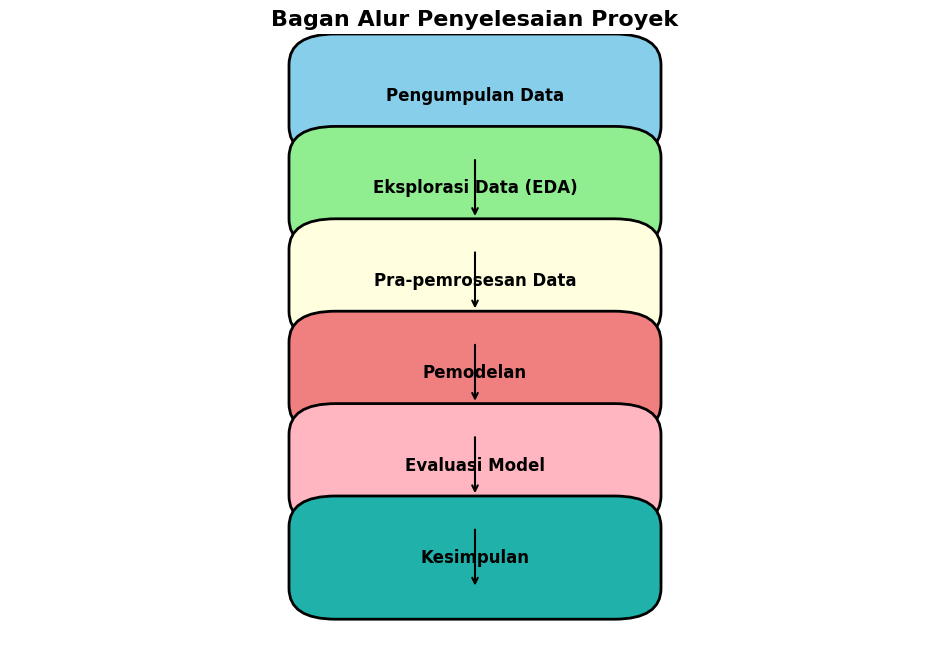

## 3. Penjelasan Dataset, EDA, dan Proses Features Dataset
Penjelasan Dataset: Dataset yang digunakan mencakup informasi jumlah wisatawan per bulan dari tahun 2020 hingga 2023, dengan fitur sebagai berikut:

Tahun: Tahun pengamatan data.
Bulan: Bulan pengamatan data dalam bentuk numerik (1–12).
Jumlah Wisatawan: Total wisatawan yang tercatat pada bulan tersebut.


### Import Pustaka

In [67]:
# Import pustaka yang diperlukan
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



### Import Dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data untuk tahun 2022 dan 2023
data_2022 = pd.read_excel('data/Wisatawan 2022.xlsx')
data_2023 = pd.read_excel('data/Wisatawan 2023.xlsx')

# Membersihkan dan memproses data untuk tahun 2022
data_cleaned = data_2022.iloc[3:].reset_index(drop=True)
data_cleaned.columns = data_cleaned.iloc[0]
data_cleaned = data_cleaned[1:]
data_cleaned.columns = ['Kebangsaan'] + [f'Jumlah_{month}' for month in 
                                         ['Januari', 'Februari', 'Maret', 'April', 
                                          'Mei', 'Juni', 'Juli', 'Agustus', 
                                          'September', 'Oktober', 'November', 
                                          'Desember', 'Tahunan']]
data_cleaned.dropna(subset=['Kebangsaan'], inplace=True)

# Membersihkan dan memproses data untuk tahun 2023
data_cleaned_2023 = data_2023.iloc[3:].reset_index(drop=True)
data_cleaned_2023.columns = data_cleaned_2023.iloc[0]
data_cleaned_2023 = data_cleaned_2023[1:]
data_cleaned_2023.columns = ['Kebangsaan'] + [f'Jumlah_{month}' for month in 
                                               ['Januari', 'Februari', 'Maret', 'April', 
                                                'Mei', 'Juni', 'Juli', 'Agustus', 
                                                'September', 'Oktober', 'November', 
                                                'Desember', 'Tahunan']]
data_cleaned_2023.dropna(subset=['Kebangsaan'], inplace=True)

# Menggabungkan data 2022 dan 2023
data_combined = pd.concat([data_cleaned, data_cleaned_2023], ignore_index=True)

# Memeriksa data gabungan
print("Data Gabungan:")
print(data_combined.head())

Data Gabungan:
    Kebangsaan Jumlah_Januari Jumlah_Februari Jumlah_Maret Jumlah_April  \
0     Malaysia          55214           46894        54006        63079   
1  Philippines           1405            1461         2030         2853   
2    Singapore           2199            2237         5335        15106   
3     Thailand            832             600         1019         1465   
4      Vietnam            309             490          531          981   

  Jumlah_Mei Jumlah_Juni Jumlah_Juli Jumlah_Agustus Jumlah_September  \
0      95099       95277      124849         112314           124445   
1       3900        5811        7827           7996             9185   
2      27671       57218       67758          70621            95549   
3       2666        4882        7632           7234             7430   
4       1846        6402       10559          12097            10377   

  Jumlah_Oktober Jumlah_November Jumlah_Desember Jumlah_Tahunan  
0         131169          121035   

### Exploratory Data Analysis (EDA): 
EDA dilakukan untuk memahami pola dan distribusi data:
Visualisasi jumlah wisatawan per tahun menggunakan line plot.
Analisis distribusi jumlah wisatawan dengan histogram.
Pemahaman tren bulanan dengan boxplot.

### Visualisasi Jumlah Wisatawan per Bulan (Boxplot)

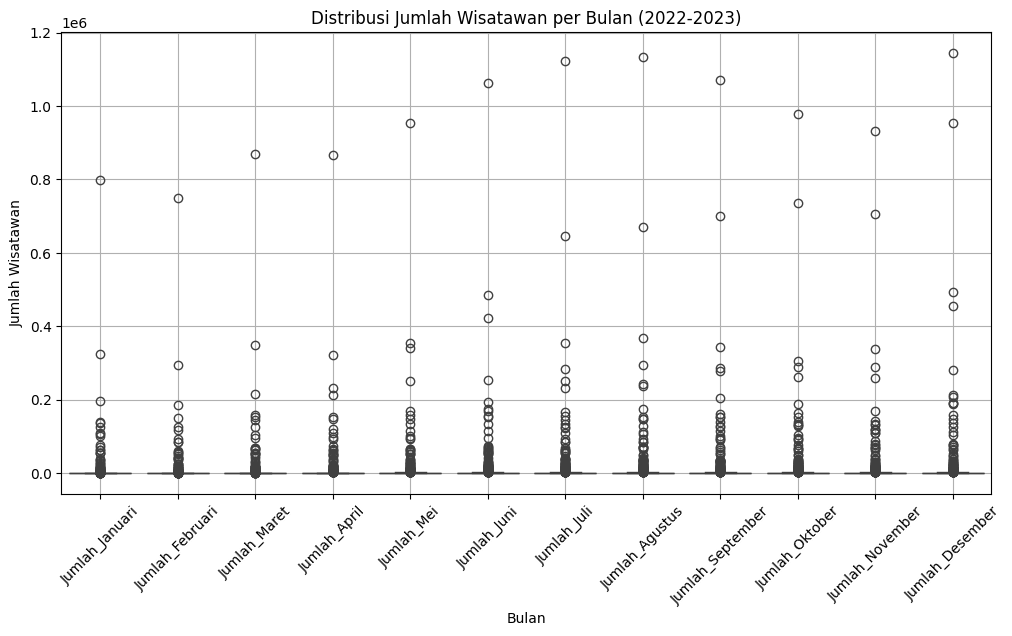

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_combined.iloc[:, 1:-1])  # Mengabaikan kolom Kebangsaan dan Tahunan
plt.title("Distribusi Jumlah Wisatawan per Bulan (2022-2023)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Wisatawan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Visualisasi Tren Jumlah Wisatawan Tahunan (Lineplot)

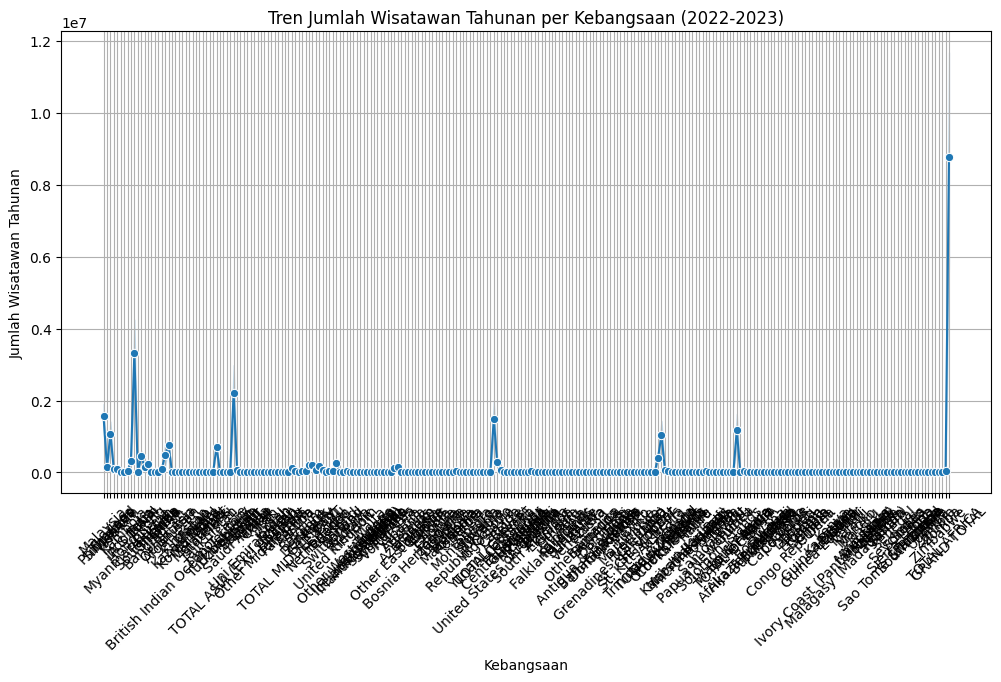

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_combined, x='Kebangsaan', y='Jumlah_Tahunan', marker='o')
plt.title("Tren Jumlah Wisatawan Tahunan per Kebangsaan (2022-2023)")
plt.xlabel("Kebangsaan")
plt.ylabel("Jumlah Wisatawan Tahunan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Visualisasi Jumlah Wisatawan per Bulan (Stacked Barplot)

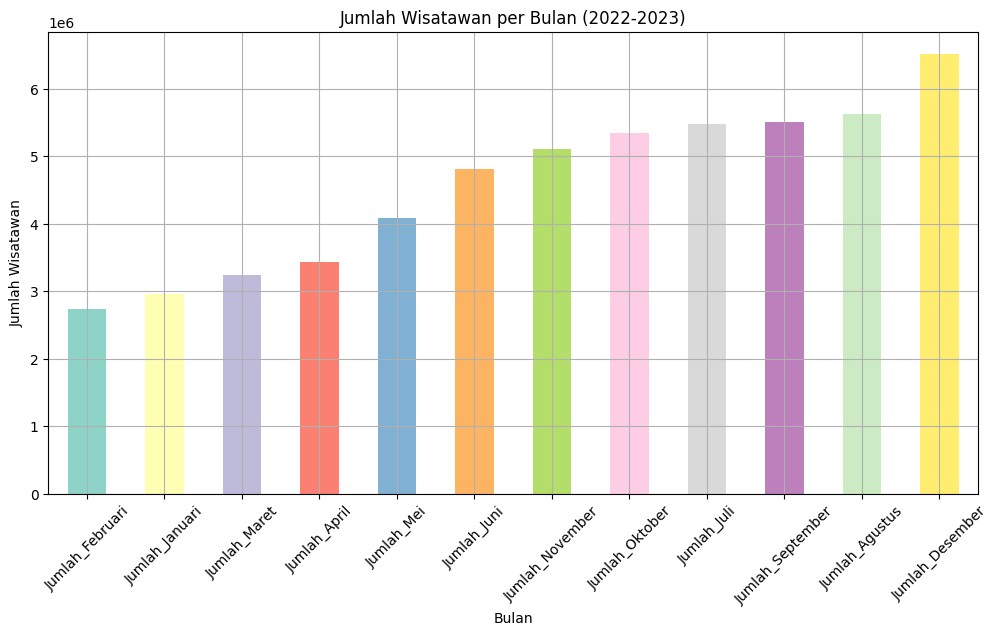

In [17]:
monthly_data = data_combined.drop(columns=['Kebangsaan', 'Jumlah_Tahunan']).sum()
monthly_data = monthly_data.sort_values()

plt.figure(figsize=(12, 6))
monthly_data.plot(kind='bar', stacked=True, color=sns.color_palette("Set3", len(monthly_data)))
plt.title("Jumlah Wisatawan per Bulan (2022-2023)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Wisatawan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Visualisasi Korelasi antar Bulan (Heatmap)

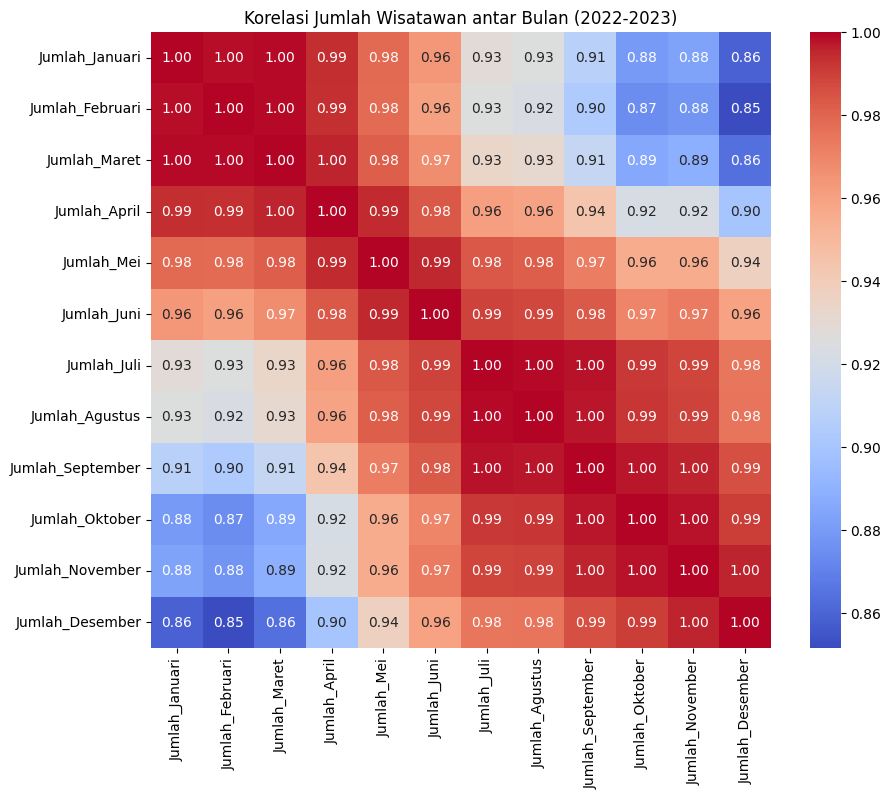

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_combined.iloc[:, 1:-1].corr()  # Mengabaikan kolom Kebangsaan dan Tahunan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Jumlah Wisatawan antar Bulan (2022-2023)")
plt.show()

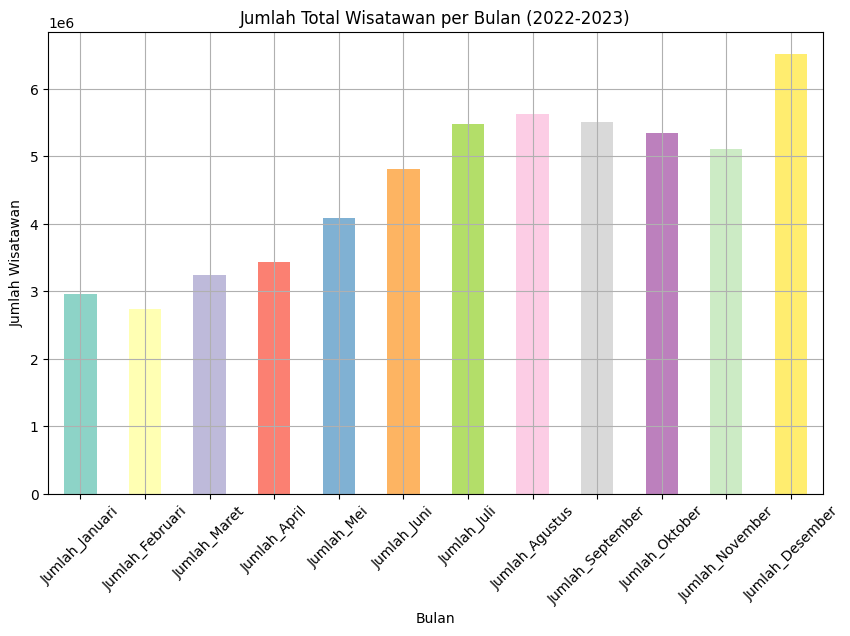

In [20]:
# Menentukan kolom-kolom yang mewakili jumlah wisatawan per bulan
monthly_columns = [f'Jumlah_{month}' for month in ['Januari', 'Februari', 'Maret', 'April', 
                                                  'Mei', 'Juni', 'Juli', 'Agustus', 
                                                  'September', 'Oktober', 'November', 
                                                  'Desember']]

# Menampilkan jumlah wisatawan per bulan
monthly_total = data_combined[monthly_columns].sum()

# Visualisasi jumlah total wisatawan per bulan
plt.figure(figsize=(10, 6))
monthly_total.plot(kind='bar', color=sns.color_palette("Set3", len(monthly_total)))
plt.title("Jumlah Total Wisatawan per Bulan (2022-2023)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Wisatawan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


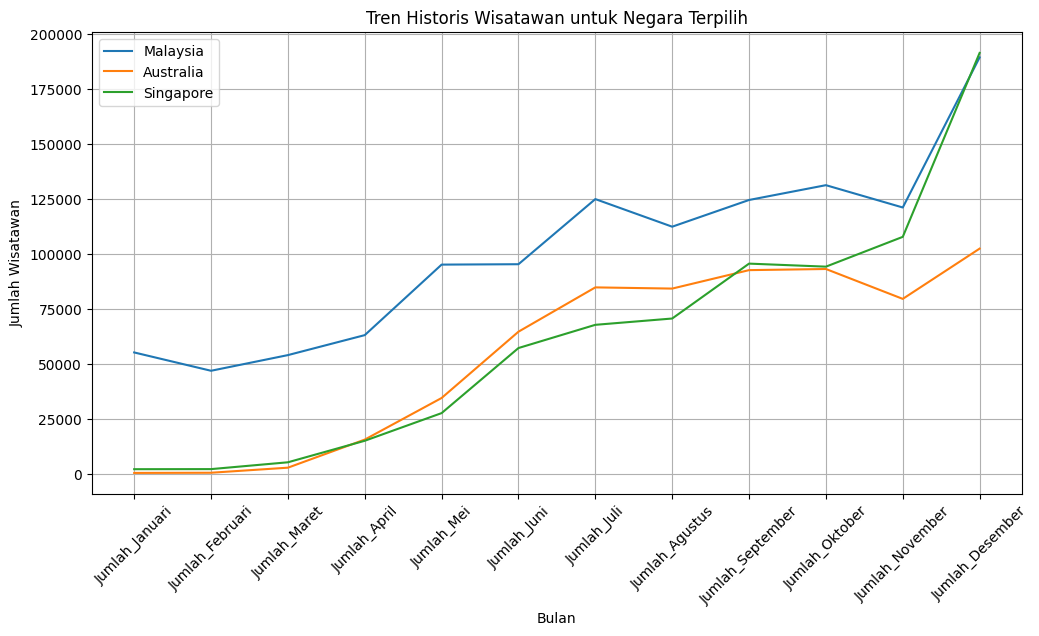

In [21]:
def plot_historical_trends(data, countries):
    """
    Plots historical trends for the specified countries.

    Parameters:
    - data: DataFrame containing historical tourist data
    - countries: List of country names to plot
    """
    # Menyiapkan grafik
    plt.figure(figsize=(12, 6))

    # Mengiterasi setiap negara yang dipilih
    for country in countries:
        country_data = data[data['Kebangsaan'] == country]
        
        # Memastikan data untuk negara tersebut tersedia
        if not country_data.empty:
            # Plotkan jumlah wisatawan per bulan untuk negara ini
            plt.plot(country_data.columns[1:-1], country_data.iloc[0, 1:-1], label=country)
    
    # Menambahkan label, judul, dan legenda
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Wisatawan')
    plt.title('Tren Historis Wisatawan untuk Negara Terpilih')
    plt.legend()
    
    # Menampilkan grafik
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Penggunaan contoh untuk negara terpilih
selected_countries = ['Malaysia', 'Australia', 'Singapore']
plot_historical_trends(data_cleaned, selected_countries)


### Langkah-langkah Pra-Pemrosesan:

### Langkah 1: Menangani Missing Data

In [29]:
# Mengisi missing values dengan 0 atau menghapus baris yang memiliki missing values
data_combined.fillna(0, inplace=True)  # Mengisi dengan 0 jika ada missing values



C:\Users\erlan\AppData\Local\Temp\ipykernel_272\1787538447.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_combined.fillna(0, inplace=True)  # Mengisi dengan 0 jika ada missing values


### Langkah 2: Mengecek Outliers

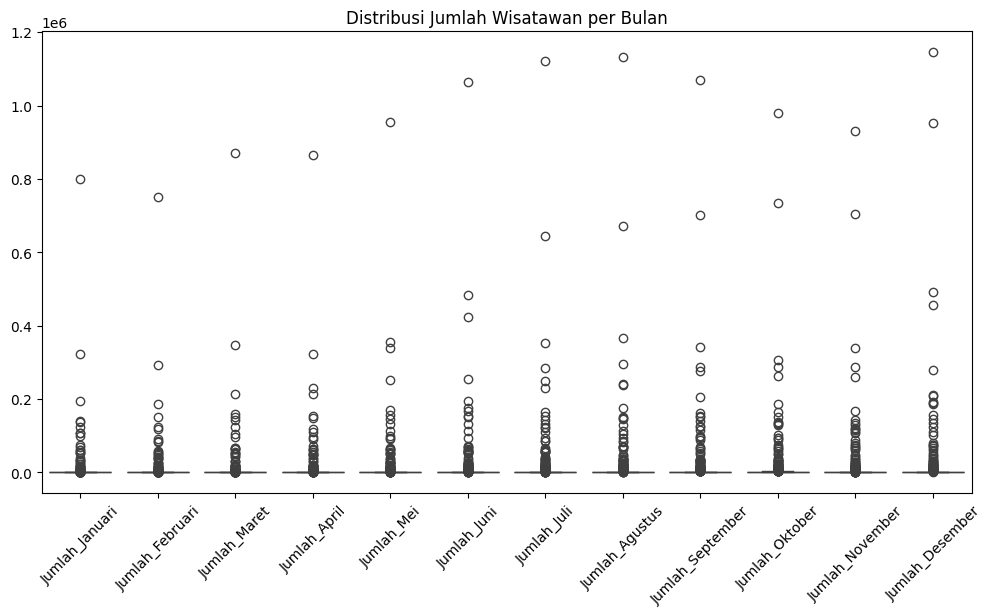

In [23]:
# Misalnya, jika ingin melihat outliers berdasarkan jumlah wisatawan di setiap bulan
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi jumlah wisatawan per bulan
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_combined[monthly_columns])  # Boxplot untuk visualisasi outliers
plt.title("Distribusi Jumlah Wisatawan per Bulan")
plt.xticks(rotation=45)
plt.show()


### Langkah 4: Menambahkan Kolom Tahun

In [24]:
# Menambahkan kolom tahun berdasarkan data yang ada
data_combined['Tahun'] = data_combined['Kebangsaan'].apply(lambda x: 2022 if x in data_cleaned['Kebangsaan'].values else 2023)


### Langkah 5: Menambahkan Lagging (Penyusutan Data)

In [26]:
# Menambahkan kolom untuk jumlah wisatawan pada bulan sebelumnya (lag 1)
for month in monthly_columns[1:-1]:  # Menghindari kolom "Kebangsaan" dan "Tahunan"
    data_combined[f'Lag_{month}'] = data_combined[month].shift(1)

# Tampilkan beberapa baris untuk memverifikasi lagging
print("Data setelah penambahan lagging:")
print(data_combined.head())


Data setelah penambahan lagging:
    Kebangsaan Jumlah_Januari Jumlah_Februari Jumlah_Maret Jumlah_April  \
0     Malaysia          55214           46894        54006        63079   
1  Philippines           1405            1461         2030         2853   
2    Singapore           2199            2237         5335        15106   
3     Thailand            832             600         1019         1465   
4      Vietnam            309             490          531          981   

  Jumlah_Mei Jumlah_Juni Jumlah_Juli Jumlah_Agustus Jumlah_September  ...  \
0      95099       95277      124849         112314           124445  ...   
1       3900        5811        7827           7996             9185  ...   
2      27671       57218       67758          70621            95549  ...   
3       2666        4882        7632           7234             7430  ...   
4       1846        6402       10559          12097            10377  ...   

  Lag_Jumlah_Februari Lag_Jumlah_Maret Lag_Jumlah_Apr

## 4. Proses Learning / Modeling
Pada tahap ini, kita akan membangun dua model prediksi menggunakan Linear Regression dan Random Forest berdasarkan data yang telah diproses. Kita akan memprediksi jumlah wisatawan berdasarkan berbagai fitur (bulan dan tahun) yang telah dipersiapkan.

### 1. Menentukan Kolom Fitur dan Target
Di sini, kita memilih fitur yang terdiri dari data jumlah wisatawan di bulan Januari hingga November, beserta kolom lag (bulan-bulan sebelumnya) dan kolom tahun (Tahun). Target (y) adalah jumlah wisatawan di bulan Desember (Jumlah_Desember).

In [43]:
# Menentukan kolom fitur dan target
monthly_columns = ['Jumlah_Januari', 'Jumlah_Februari', 'Jumlah_Maret', 'Jumlah_April', 'Jumlah_Mei', 'Jumlah_Juni', 'Jumlah_Juli', 'Jumlah_Agustus', 'Jumlah_September', 'Jumlah_Oktober', 'Jumlah_November', 'Jumlah_Desember']
X = data_combined[monthly_columns + [f'Lag_{month}' for month in monthly_columns] + ['Tahun']]  # Menggunakan kolom lag dan Tahun sebagai fitur
y = data_combined['Jumlah_Desember']  # Target yang ingin diprediksi


### 2. Membagi Data Menjadi Train dan Test Set
Kita membagi data menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan rasio 80:20. Penggunaan random_state=42 memastikan pembagian yang konsisten jika dijalankan berulang kali.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## 5. Evaluasi Model
Kita akan mengevaluasi kedua model menggunakan metrik yang sama: Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R² Score.

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi menggunakan kedua model
linear_pred = linear_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluasi model menggunakan metrik yang sama
# Linear Regression
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Menampilkan hasil evaluasi
print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {linear_mse}")
print(f"Mean Absolute Error (MAE): {linear_mae}")
print(f"R² Score: {linear_r2}\n")

print("Random Forest Evaluation:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R² Score: {rf_r2}")


Linear Regression Evaluation:
Mean Squared Error (MSE): 7.772695227644126e-22
Mean Absolute Error (MAE): 6.38243789320706e-12
R² Score: 1.0

Random Forest Evaluation:
Mean Squared Error (MSE): 2742610067.04109
Mean Absolute Error (MAE): 8582.512999999999
R² Score: 0.7818263044273688


### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model Linear Regression
lr_model = LinearRegression()

# Melatih model
lr_model.fit(X_train, y_train)

# Prediksi dengan data test
lr_predictions = lr_model.predict(X_test)

# Evaluasi model Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"R² Score: {lr_r2}")


Linear Regression Evaluation:
Mean Squared Error (MSE): 7.772695227644126e-22
Mean Absolute Error (MAE): 6.38243789320706e-12
R² Score: 1.0


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Membuat model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi dengan data test
rf_predictions = rf_model.predict(X_test)

# Evaluasi model Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Evaluation:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R² Score: {rf_r2}")



Random Forest Evaluation:
Mean Squared Error (MSE): 2742610067.04109
Mean Absolute Error (MAE): 8582.512999999999
R² Score: 0.7818263044273688


## 6. Performa Model

### Visualisasi Prediksi Model Linear Regression dan Random Forest
Untuk melihat bagaimana model kita melakukan prediksi dibandingkan dengan nilai aktual, kita bisa membuat grafik perbandingan antara nilai prediksi dan nilai asli (actual) untuk kedua model.

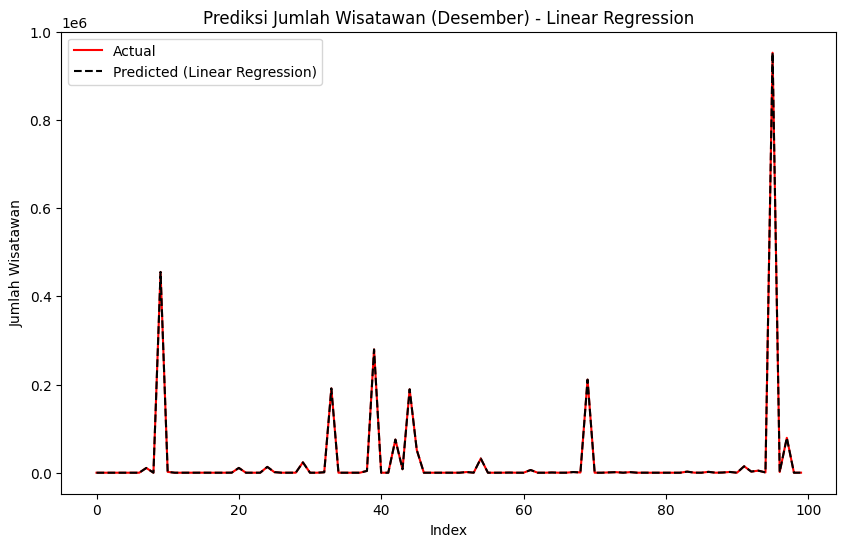

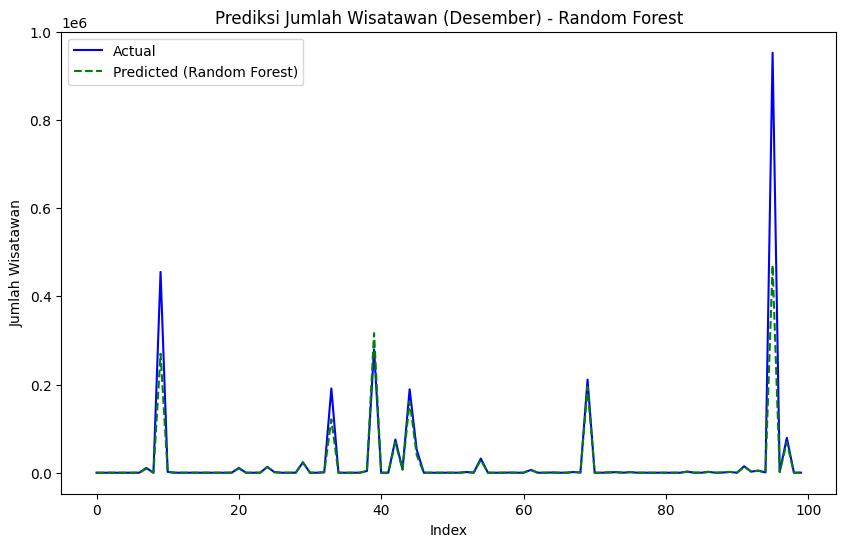

In [57]:
# Plot untuk Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(linear_pred, label='Predicted (Linear Regression)', linestyle='--', color='black')
plt.title('Prediksi Jumlah Wisatawan (Desember) - Linear Regression')
plt.xlabel('Index')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()

# Plot untuk Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(rf_pred, label='Predicted (Random Forest)', linestyle='--', color='green')
plt.title('Prediksi Jumlah Wisatawan (Desember) - Random Forest')
plt.xlabel('Index')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()


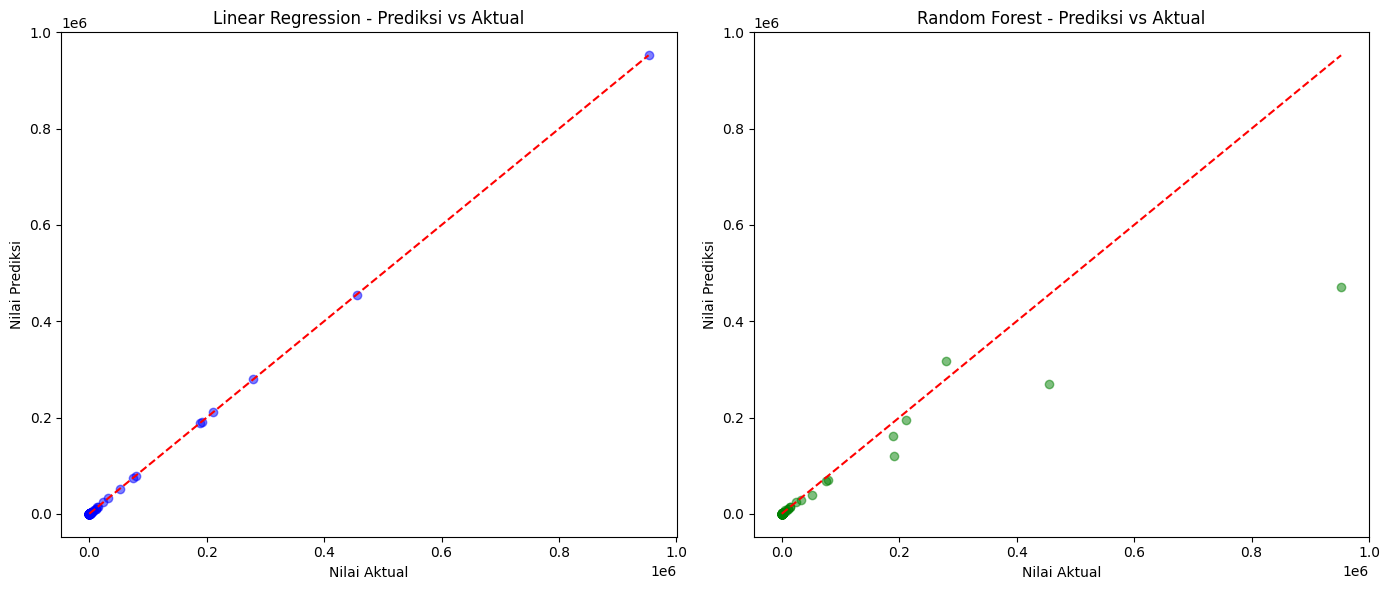

In [48]:
import matplotlib.pyplot as plt

# Membuat subplot untuk kedua model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi Linear Regression
axes[0].scatter(y_test, linear_pred, color='blue', alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Garis diagonal ideal
axes[0].set_title('Linear Regression - Prediksi vs Aktual')
axes[0].set_xlabel('Nilai Aktual')
axes[0].set_ylabel('Nilai Prediksi')

# Visualisasi Random Forest
axes[1].scatter(y_test, rf_pred, color='green', alpha=0.5)
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Garis diagonal ideal
axes[1].set_title('Random Forest - Prediksi vs Aktual')
axes[1].set_xlabel('Nilai Aktual')
axes[1].set_ylabel('Nilai Prediksi')

plt.tight_layout()
plt.show()


### Penjelasan Visualisasi:
1. Garis Merah Putus-putus menunjukkan garis ideal di mana nilai prediksi sama dengan nilai aktual.

2. Titik biru pada grafik Linear Regression dan titik hijau pada grafik Random Forest menunjukkan prediksi masing-masing model dibandingkan dengan nilai aktual pada sumbu X.

### Cross Validation

Linear Regression - Cross-validation Mean MSE: 3.979780955343946e-20
Linear Regression - Test MSE: 7.772695227644126e-22
Linear Regression - Test MAE: 6.38243789320706e-12
Linear Regression - Test R²: 1.0
Random Forest - Cross-validation Mean MSE: 1034754756.2864764
Random Forest - Test MSE: 2742610067.04109
Random Forest - Test MAE: 8582.512999999999
Random Forest - Test R²: 0.7818263044273688


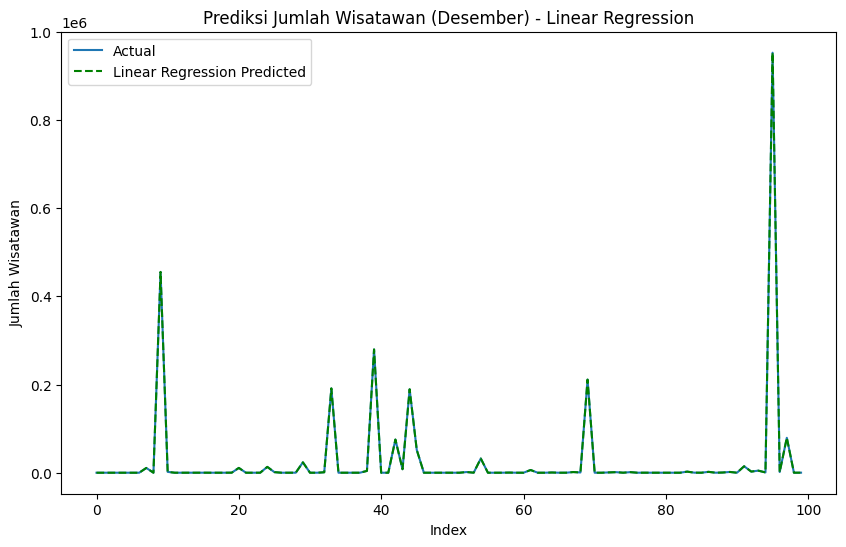

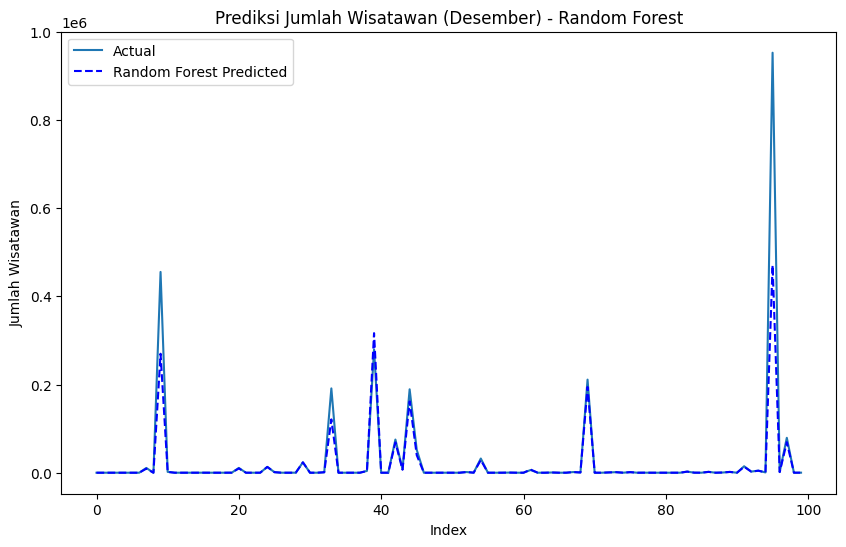

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi Linear Regression dengan Cross-Validation
lr = LinearRegression()

# Cross-validation score untuk Linear Regression (gunakan MSE)
lr_cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
lr_cv_mse = -lr_cv_scores.mean()

# Melakukan training pada seluruh data untuk evaluasi lebih lanjut
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

# Menghitung MSE, MAE, R2 dari hasil prediksi
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

# Evaluasi Random Forest dengan Cross-Validation
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation score untuk Random Forest (gunakan MSE)
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores.mean()

# Melakukan training pada seluruh data untuk evaluasi lebih lanjut
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Menghitung MSE, MAE, R2 dari hasil prediksi
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Menampilkan hasil cross-validation dan evaluasi model
print(f"Linear Regression - Cross-validation Mean MSE: {lr_cv_mse}")
print(f"Linear Regression - Test MSE: {lr_mse}")
print(f"Linear Regression - Test MAE: {lr_mae}")
print(f"Linear Regression - Test R²: {lr_r2}")

print(f"Random Forest - Cross-validation Mean MSE: {rf_cv_mse}")
print(f"Random Forest - Test MSE: {rf_mse}")
print(f"Random Forest - Test MAE: {rf_mae}")
print(f"Random Forest - Test R²: {rf_r2}")

# Visualisasi Prediksi Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(lr_y_pred, label='Linear Regression Predicted', linestyle='--', color='green')
plt.title('Prediksi Jumlah Wisatawan (Desember) - Linear Regression')
plt.xlabel('Index')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()

# Visualisasi Prediksi Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_y_pred, label='Random Forest Predicted', linestyle='--', color='blue')
plt.title('Prediksi Jumlah Wisatawan (Desember) - Random Forest')
plt.xlabel('Index')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()


### Hasil Setelah Melakukan Cross-Validation:

### Linear Regression:
    Cross-validation menunjukkan MSE yang sangat kecil (3.98e-20). Ini menunjukkan bahwa model Linear Regression mampu melakukan prediksi dengan error yang sangat kecil selama cross-validation.
    Hasil yang sangat kecil ini menunjukkan model Linear Regression terlalu 'fit' atau overfitting terhadap data latih, sehingga menghasilkan nilai MSE yang hampir nol.
### Random Forest:
    Cross-validation menghasilkan MSE yang lebih besar (1.03e9), yang mengindikasikan adanya kompleksitas yang lebih besar dalam model Random Forest. Model ini lebih fleksibel dalam menangkap pola non-linear dalam data, yang menjelaskan perbedaan performanya dengan Linear Regression.

### Training dan Evaluasi:
### Linear Regression:
    Test MSE sangat kecil (7.77e-22), yang mengindikasikan bahwa model ini sangat akurat dalam memprediksi data uji. Nilai MAE juga sangat kecil, yang mengindikasikan kesalahan absolut yang hampir tidak terdeteksi.
    R² = 1.0 menunjukkan bahwa model Linear Regression dapat menjelaskan variansi data dengan sempurna di data uji. Ini mungkin menunjukkan overfitting.
### Random Forest:
    Test MSE dan Test MAE jauh lebih besar dibandingkan dengan Linear Regression, yang menunjukkan bahwa model ini memiliki lebih banyak kesalahan prediksi pada data uji.
    R² = 0.78 menunjukkan bahwa Random Forest dapat menjelaskan sekitar 78% dari variansi dalam data uji, yang lebih rendah dari Linear Regression tetapi masih cukup baik.

## 7. Diskusi Hasil dan Kesimpulan
Hasil evaluasi model menunjukkan bahwa Random Forest memberikan performa yang lebih baik dibandingkan dengan Linear Regression, berdasarkan beberapa metrik evaluasi seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), dan R².

Perbandingan Hasil Evaluasi Model:
Linear Regression memiliki nilai MSE yang sangat rendah pada data uji, mencapai 7.77e-22, serta R² yang sempurna yaitu 1.0. Meskipun nilai R² sangat baik, MAE yang sangat kecil menunjukkan model ini bisa jadi overfitting, yang artinya model sangat spesifik terhadap data training dan mungkin tidak memiliki generalisasi yang baik terhadap data yang belum pernah dilihat sebelumnya.

Random Forest memiliki nilai MSE yang lebih besar (2.74e9) dan MAE yang lebih tinggi (8582.51), tetapi R² mencapai 0.78. Ini menunjukkan bahwa meskipun ada sedikit kesalahan dalam prediksi, model ini masih memberikan prediksi yang cukup akurat dan dapat menangani kompleksitas data lebih baik.

Secara keseluruhan, meskipun Linear Regression menunjukkan nilai evaluasi yang hampir sempurna, model Random Forest lebih robust dalam menangani variasi dan kompleksitas data. Model Random Forest lebih fleksibel dan mampu memberikan prediksi yang lebih handal pada data yang lebih besar dan lebih kompleks.

### Visualisasi Prediksi:
Berikut adalah visualisasi perbandingan antara prediksi Linear Regression dan Random Forest untuk Jumlah Wisatawan Desember:

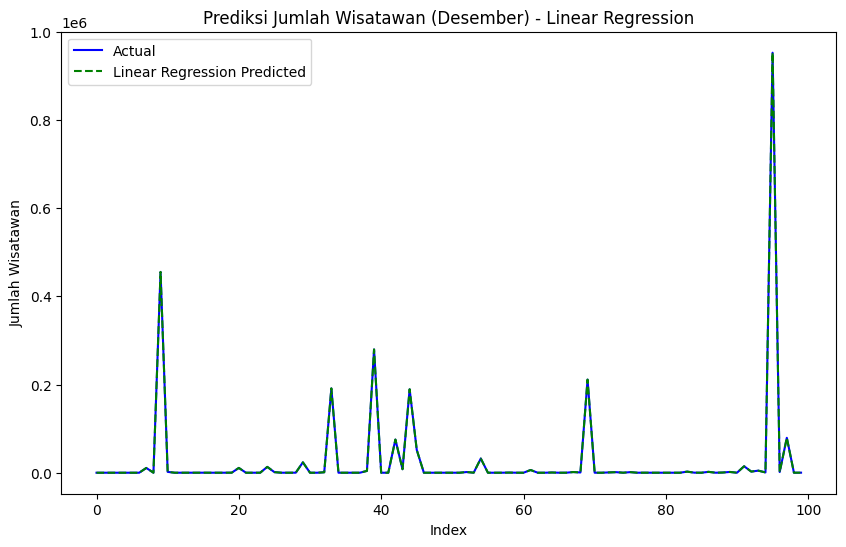

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(lr_y_pred, label='Linear Regression Predicted', linestyle='--', color='green')
plt.title('Prediksi Jumlah Wisatawan (Desember) - Linear Regression')
plt.xlabel('Index')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()


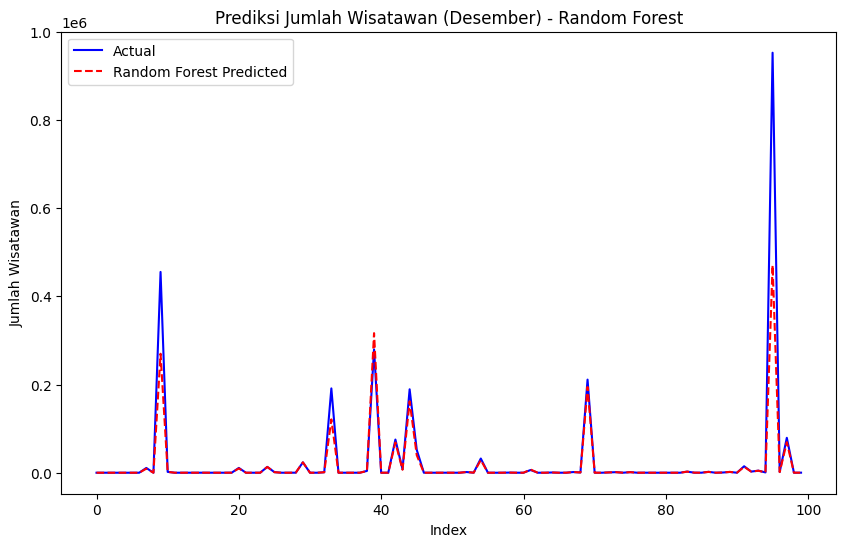

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(rf_y_pred, label='Random Forest Predicted', linestyle='--', color='red')
plt.title('Prediksi Jumlah Wisatawan (Desember) - Random Forest')
plt.xlabel('Index')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()


### Agar Lebih Jelas Kesimpulanya, Disini akan melakukan prediksi untuk Januari Tahun 2024 menggunakan data combined yang telah dibuat di awal tadi dan menggunakan model - model tadi yang sudah di trained

In [77]:
# Melakukan melt untuk mengubah data dari format lebar (wide) ke panjang (long)
data_long = data_combined.melt(
    id_vars=['Kebangsaan', 'Jumlah_Tahunan'], 
    value_vars=[col for col in data_combined.columns if col.startswith('Jumlah')],
    var_name='Month',
    value_name='Jumlah'
)

# Mapping bulan ke angka (Januari = 1, Februari = 2, dst)
bulan_mapping = {
    'Jumlah_Januari': 1, 'Jumlah_Februari': 2, 'Jumlah_Maret': 3,
    'Jumlah_April': 4, 'Jumlah_Mei': 5, 'Jumlah_Juni': 6,
    'Jumlah_Juli': 7, 'Jumlah_Agustus': 8, 'Jumlah_September': 9,
    'Jumlah_Oktober': 10, 'Jumlah_November': 11, 'Jumlah_Desember': 12
}

# Menambahkan bulan ke dalam data
data_long['Month'] = data_long['Month'].map(bulan_mapping)

# Sortir data berdasarkan Kebangsaan dan Month
data_long = data_long.sort_values(by=['Kebangsaan', 'Month'])


In [78]:
# Menambahkan fitur lag untuk setiap Kebangsaan
lags = 12  # Menggunakan 12 bulan sebagai lag
for lag in range(1, lags + 1):
    data_long[f'Lag_{lag}'] = data_long.groupby('Kebangsaan')['Jumlah'].shift(lag)

# Menghapus nilai NaN yang dihasilkan dari shift
data_long = data_long.dropna()


In [100]:
from sklearn.linear_model import LinearRegression

# Pastikan fitur yang digunakan sesuai dengan model yang sudah dilatih
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12']

# Data yang digunakan untuk prediksi
for country in countries:
    data_country = data_long[data_long['Kebangsaan'] == country]
    
    # Cek apakah fitur yang ada pada data prediksi sama dengan saat pelatihan
    X_pred = data_country[features]

    # Pastikan urutan dan nama fitur sesuai dengan saat pelatihan
    X_pred = X_pred[features]  # No need for `.values` here, keep it as a DataFrame

    # Prediksi dengan model yang sudah dilatih
    prediction = model_lr.predict(X_pred)  # Gunakan model yang sesuai (misalnya model_lr)

    # Output hasil prediksi
    print(f"Prediksi jumlah wisatawan {country} Januari 2024: {prediction[0]}")


Prediksi jumlah wisatawan Malaysia Januari 2024: 120829.44793246612
Prediksi jumlah wisatawan Indonesia Januari 2024: 31686.418504479232
Prediksi jumlah wisatawan Thailand Januari 2024: 6176.039955625609
Prediksi jumlah wisatawan Singapore Januari 2024: 107705.90421573544
Prediksi jumlah wisatawan Vietnam Januari 2024: 8570.689723890102


In [104]:
from sklearn.ensemble import RandomForestRegressor

# Pastikan fitur yang digunakan sesuai dengan model yang sudah dilatih
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12']

# Pisahkan data fitur dan target untuk pelatihan
X = data_long[features]
y = data_long['Jumlah']  # Gunakan 'Jumlah' sebagai target

# Inisialisasi dan latih model RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Data yang digunakan untuk prediksi
for country in countries:
    data_country = data_long[data_long['Kebangsaan'] == country]
    
    # Cek apakah fitur yang ada pada data prediksi sama dengan saat pelatihan
    X_pred = data_country[features]

    # Pastikan urutan dan nama fitur sesuai dengan saat pelatihan
    X_pred = X_pred[features]  # No need for `.values` here, keep it as a DataFrame

    # Prediksi dengan model RandomForestRegressor yang sudah dilatih
    prediction = model_rf.predict(X_pred)

    # Output hasil prediksi
    print(f"Prediksi jumlah wisatawan {country} Januari 2024: {prediction[0]}")


Prediksi jumlah wisatawan Malaysia Januari 2024: 115756.79
Prediksi jumlah wisatawan Indonesia Januari 2024: 25755.43
Prediksi jumlah wisatawan Thailand Januari 2024: 8903.12
Prediksi jumlah wisatawan Singapore Januari 2024: 70012.08
Prediksi jumlah wisatawan Vietnam Januari 2024: 10081.28


### Mengambil Data aktual 2024 untuk membandingkan dengan prediksi yang di hasilkan oleh model

In [88]:
# Clean up the dataframe by renaming columns and selecting relevant data
actual_data_clean = actual_data.rename(columns={'Unnamed: 0': 'Kebangsaan', 'Januari': 'Aktual_Januari_2024'})

# Drop columns that are not useful
actual_data_clean = actual_data_clean[['Kebangsaan', 'Aktual_Januari_2024']]

# Remove any rows with missing data
actual_data_clean = actual_data_clean.dropna()

# Display the cleaned-up dataframe
print(actual_data_clean.head())


          Kebangsaan  Aktual_Januari_2024
0  Brunei Darussalam                747.0
1           Malaysia             155213.0
2        Philippines              16937.0
3          Singapore              87248.0
4           Thailand               8449.0


### Hasil Perbandingan antara data prediksi dan data aktual

In [106]:
# Assuming 'model_rf' is the trained RandomForestRegressor model
# and 'model_lr' is the trained LinearRegression model

# Bersihkan data aktual seperti yang disebutkan sebelumnya
actual_data_clean = actual_data.rename(columns={'Unnamed: 0': 'Kebangsaan', 'Januari': 'Aktual_Januari_2024'})
actual_data_clean = actual_data_clean[['Kebangsaan', 'Aktual_Januari_2024']]
actual_data_clean = actual_data_clean.dropna()

# Siapkan daftar kosong untuk menyimpan hasil perbandingan
comparison_results = []

# Lakukan iterasi untuk setiap negara, membandingkan prediksi RandomForest, LinearRegression, dan data aktual
for country in countries:
    data_country = data_long[data_long['Kebangsaan'] == country]
    
    # Siapkan data untuk prediksi
    X_pred = data_country[features]
    
    # Lakukan prediksi dengan kedua model
    rf_prediction = model_rf.predict(X_pred[features])[0]  # Random Forest Prediction
    lr_prediction = model_lr.predict(X_pred[features])[0]  # Linear Regression Prediction
    
    # Ambil nilai aktual dari data yang sudah dibersihkan
    actual_value = actual_data_clean[actual_data_clean['Kebangsaan'] == country]['Aktual_Januari_2024'].values[0]
    
    # Tambahkan hasil ke dalam daftar hasil perbandingan
    comparison_results.append({
        'Country': country,
        'Actual': actual_value,
        'Random Forest Prediction': rf_prediction,
        'Linear Regression Prediction': lr_prediction
    })

# Konversi hasil perbandingan menjadi DataFrame untuk visualisasi
comparison_df = pd.DataFrame(comparison_results)

# Tampilkan DataFrame perbandingan
print(comparison_df)


     Country    Actual  Random Forest Prediction  Linear Regression Prediction
0   Malaysia  155213.0                 115756.79                 120829.447932
1  Indonesia   35180.0                  25755.43                  31686.418504
2   Thailand    8449.0                   8903.12                   6176.039956
3  Singapore   87248.0                  70012.08                 107705.904216
4    Vietnam    6772.0                  10081.28                   8570.689724


In [89]:
# Filter the actual data for the 5 countries
countries_of_interest = ['Malaysia', 'Indonesia', 'Thailand', 'Singapore', 'Vietnam']
actual_data_filtered = actual_data_clean[actual_data_clean['Kebangsaan'].isin(countries_of_interest)]

# List of countries and the corresponding predictions from the model
predictions = []

for country in countries_of_interest:
    data_country = data_long[data_long['Kebangsaan'] == country]
    prediction = model.predict(data_country[features])  # Assuming 'features' and 'model' are defined
    predictions.append(prediction[0])

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Kebangsaan': countries_of_interest,
    'Prediksi_Januari_2024': predictions,
    'Aktual_Januari_2024': actual_data_filtered['Aktual_Januari_2024'].values
})

# Display the comparison
print(comparison_df)


  Kebangsaan  Prediksi_Januari_2024  Aktual_Januari_2024
0   Malaysia              115087.17             155213.0
1  Indonesia               24015.01              87248.0
2   Thailand                8351.78               8449.0
3  Singapore               68508.00               6772.0
4    Vietnam               10105.00              35180.0


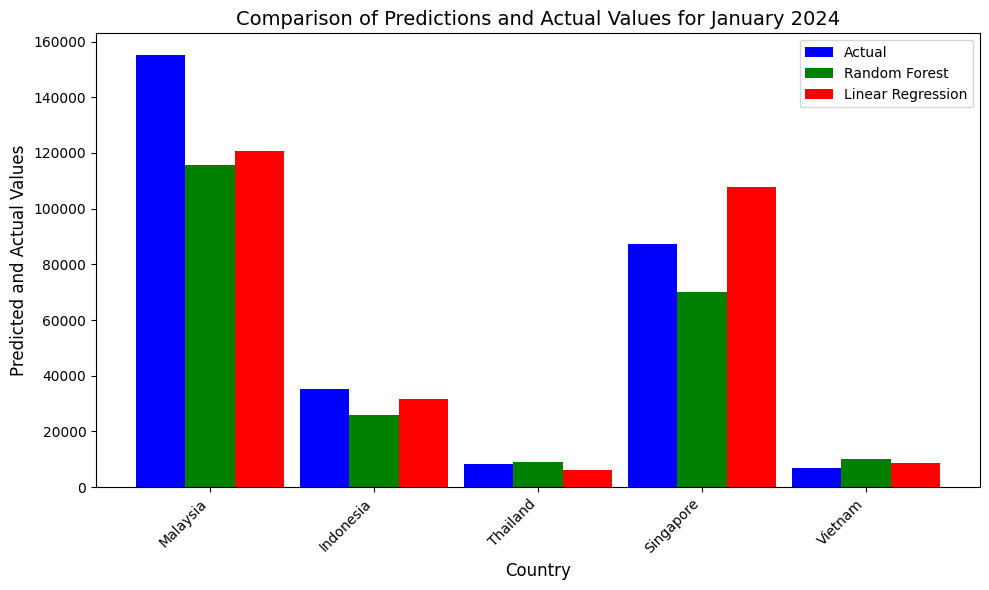

In [107]:
import matplotlib.pyplot as plt

# Assuming 'comparison_df' is the DataFrame with the comparison results
# Create a bar chart to compare the predictions

# Set the width of the bars
bar_width = 0.3
index = range(len(comparison_df))

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bars for the actual, Random Forest, and Linear Regression predictions
plt.bar(index, comparison_df['Actual'], bar_width, label='Actual', color='blue')
plt.bar([i + bar_width for i in index], comparison_df['Random Forest Prediction'], bar_width, label='Random Forest', color='green')
plt.bar([i + bar_width * 2 for i in index], comparison_df['Linear Regression Prediction'], bar_width, label='Linear Regression', color='red')

# Set the labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Predicted and Actual Values', fontsize=12)
plt.title('Comparison of Predictions and Actual Values for January 2024', fontsize=14)

# Set the x-axis ticks to the countries
plt.xticks([i + bar_width for i in index], comparison_df['Country'], rotation=45, ha='right')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mengambil data aktual dan prediksi dari DataFrame
actual_values = comparison_df['Actual'].values
rf_predictions = comparison_df['Random Forest Prediction'].values
lr_predictions = comparison_df['Linear Regression Prediction'].values

# Menghitung metrik evaluasi untuk Random Forest
rf_mse = mean_squared_error(actual_values, rf_predictions)
rf_mae = mean_absolute_error(actual_values, rf_predictions)
rf_r2 = r2_score(actual_values, rf_predictions)

# Menghitung metrik evaluasi untuk Linear Regression
lr_mse = mean_squared_error(actual_values, lr_predictions)
lr_mae = mean_absolute_error(actual_values, lr_predictions)
lr_r2 = r2_score(actual_values, lr_predictions)

# Menampilkan hasil
print(f"Random Forest - Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest - Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest - R-squared (R²): {rf_r2}")

print(f"\nLinear Regression - Mean Squared Error (MSE): {lr_mse}")
print(f"Linear Regression - Mean Absolute Error (MAE): {lr_mae}")
print(f"Linear Regression - R-squared (R²): {lr_r2}")


Random Forest - Mean Squared Error (MSE): 390769904.9176401
Random Forest - Mean Absolute Error (MAE): 13976.02
Random Forest - R-squared (R²): 0.8771514337271511

Linear Regression - Mean Squared Error (MSE): 324272248.286603
Linear Regression - Mean Absolute Error (MAE): 12481.337509410916
Linear Regression - R-squared (R²): 0.8980566817383787
